In [27]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random

0

In [30]:
pop_size = 3.3e8
# SARS-Cov-2 (COVID-19)
y = 1/14
sigma = 1/4.5

In [24]:
np.linspace(0, t_length, grid_size)

array([  0.        ,   0.55055055,   1.1011011 ,   1.65165165,
         2.2022022 ,   2.75275275,   3.3033033 ,   3.85385385,
         4.4044044 ,   4.95495495,   5.50550551,   6.05605606,
         6.60660661,   7.15715716,   7.70770771,   8.25825826,
         8.80880881,   9.35935936,   9.90990991,  10.46046046,
        11.01101101,  11.56156156,  12.11211211,  12.66266266,
        13.21321321,  13.76376376,  14.31431431,  14.86486486,
        15.41541542,  15.96596597,  16.51651652,  17.06706707,
        17.61761762,  18.16816817,  18.71871872,  19.26926927,
        19.81981982,  20.37037037,  20.92092092,  21.47147147,
        22.02202202,  22.57257257,  23.12312312,  23.67367367,
        24.22422422,  24.77477477,  25.32532533,  25.87587588,
        26.42642643,  26.97697698,  27.52752753,  28.07807808,
        28.62862863,  29.17917918,  29.72972973,  30.28028028,
        30.83083083,  31.38138138,  31.93193193,  32.48248248,
        33.03303303,  33.58358358,  34.13413413,  34.68

In [25]:
x =  (1,2,3)
x[1]

2

In [45]:
class EpidemicModel:
    def __init__(self,x ,date_start, date_end,R0, natural_death_rate=0.02, disease_death_rate=0.01):
        # x is state vector which contains (susceptible, exposed, infectious)
        self.x = x
        self.date_start = date_start
        self.date_end = date_end
        self.R0 = R0
        self.decodeVector()
        self.susceptible = x[0]
        self.exposed = x[1]
        self.infections = x[2]
        self.natural_death_rate = natural_death_rate
        self.disease_death_rate = disease_death_rate
        self.birth_rate = birth_rate
        self.immune = {}
        
        
     
    def main(self):
        time_elpased = self.date_end - self.date_start
        for i in range(time_elpased):
            self.exposure()
            self.born()
            self.die_from_disease()
            self.natural_death()
            self.recover()
    
    
    def decodeVector(self):
        if(self.x):
            self.susceptible, self.exposed, self.infectious = self.x
            
    
    def exposure(self):
        self.susceptible *= (1- exposure_rate)
        self.infectious *=  (1 + exposure_rate) 
        
    
    def natural_death(self,natural_death_rate):
        random_d = random.randint(0,2)
        vector = self.x
        vector[random_d] *= (1- natural_death_rate)
        self.x = vector
        
    def born(self):
        self.susceptible *= (1 + born_rate)
        
    def die_from_disease(self):
        self.infectious *= (1 - infectious_rate)
        
    def flys_in(self):
        self.infectious *= (1 + flys_in_rate)
        
    def recover(self, n_recover, date):
        self.infectious += n_recover
        self.immune[date] = n_recover
    
    if __name__ == "__main__":
        main()

NameError: name 'self' is not defined

In [17]:
def F(x, t, R0=3):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    susceptible, exposed, infectious = x
    print(x)

    # New exposure of susceptibles
    b = R0(t) * y if callable(R0) else R0 * y
    ne = b * susceptible * infectious

    # Time derivatives
    ds = - ne
    de = ne - sigma * e
    di = sigma * e - y * i

    return ds, de, di

In [18]:
# initial conditions of s, e, i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

In [19]:
x_0 = s_0, e_0, i_0

In [20]:
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path

In [21]:
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [22]:
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

[9.999995e-01 4.000000e-07 1.000000e-07]


NameError: name 'e' is not defined

In [23]:
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

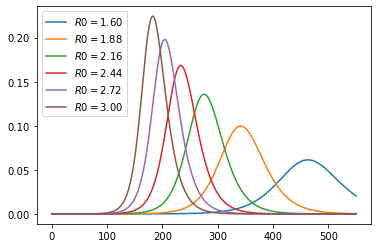

In [12]:
plot_paths(i_paths, labels)

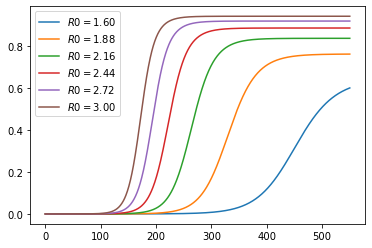

In [13]:
plot_paths(c_paths, labels)